# 🚢 Titanic Survival Prediction Using Machine Learning

## Introduction:

Welcome to this notebook on Titanic survival prediction using machine learning! In this project, we aim to predict the survival status of passengers on the Titanic based on various features. We will follow a systematic approach that includes data loading, preprocessing, feature engineering, model building, and generating predictions.

## 📊 Steps Overview:

### 1. Load the Dataset
   - **Code:** `train = pd.read_csv('./train.csv')` and `test = pd.read_csv('./test.csv')`
   - **Description:** Load the training and test datasets containing passenger information.

### 2. Pre-processing the Dataset
   - **Code:** Handle missing values, drop unnecessary columns, and perform basic data cleaning.
   - **Description:** Prepare the data for model training by addressing missing values and ensuring data integrity.

### 3. Exploratory Data Analysis (EDA)
   - **Code:** Utilize visualizations to explore and understand the distribution of key features.
   - **Description:** Gain insights into the dataset and identify patterns that may influence survival predictions.

### 4. Feature Engineering
   - **Code:** Create new features or modify existing ones to enhance the predictive power of the model.
   - **Description:** Develop relevant features that can capture additional information from the dataset.

### 5. Train-Test Split for Model Training
   - **Code:** Use `train_test_split` to split the dataset into training and validation sets.
   - **Description:** Divide the data to train the model on one subset and validate its performance on another.

### 6. Model Training (Random Forest Classifier)
   - **Code:** Train a Random Forest Classifier on the training set.
   - **Description:** Implement a machine learning model to learn patterns from the training data.

### 7. Model Evaluation and Prediction
   - **Code:** Evaluate the model on the validation set and generate predictions for the test set.
   - **Description:** Assess the model's performance and make predictions for unseen data.

### 8. XGBoost Model (Optional)
   - **Code:** Implement an Extreme Gradient Boosting (XGBoost) model for comparison.
   - **Description:** Explore the use of a different algorithm and evaluate its impact on prediction accuracy.

### 9. Conclusion
   - **Description:** Summarize the results, explore potential areas for improvement, and reflect on the overall model performance.

Feel free to dive into each section to explore the details and enhance your understanding of the machine learning process applied to the Titanic dataset!


## Importing Libraries and Initial setup

In [13]:
# Import necessary libraries
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Set up the environment
plt.style.use('fivethirtyeight') 
%matplotlib inline 

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore') 


In [14]:
# Load the training dataset
train = pd.read_csv('./train.csv') 

# Load the test dataset
test = pd.read_csv('./test.csv')

In [15]:
# Check the shape of the training dataset
train.shape

(891, 12)

In [16]:
# Check the shape of the testing dataset
test.shape

(418, 11)

In [17]:
# Display information about the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Display information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
# Check for missing values in the training dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Check for missing values in the test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Descriptive statistics for the training dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# Descriptive statistics for the testing dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Visualization

### Distribution of Target Variable

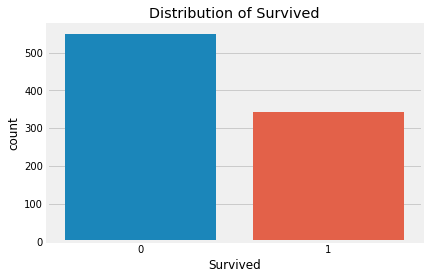

In [27]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survived')
plt.show()

### Age Distribution

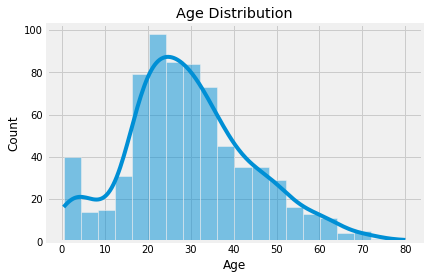

In [28]:
# Visualize the distribution of age
sns.histplot(train['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### Correlation Matrix

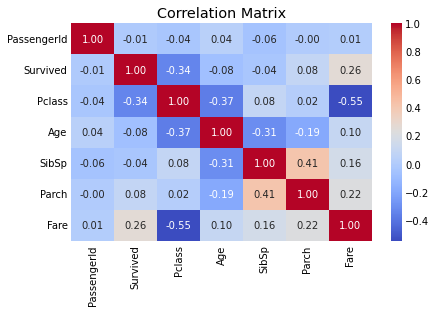

In [29]:
# Visualize the correlation matrix
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Pclass vs. Survived

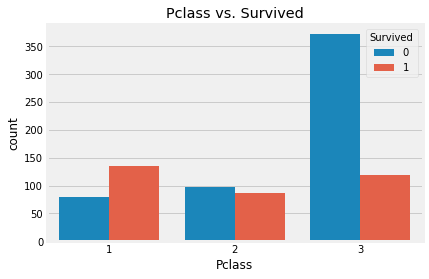

In [30]:
# Visualize the relationship between Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass vs. Survived')
plt.show()

### Gender vs. Survived

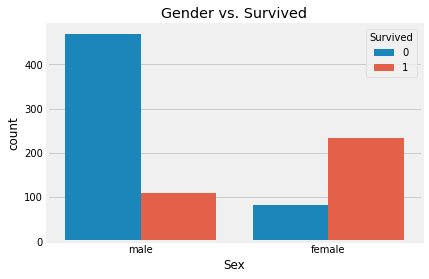

In [31]:
# Visualize the relationship between Sex and Survived
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Gender vs. Survived')
plt.show()

### Fare Distribution

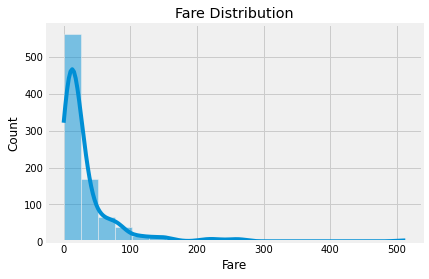

In [32]:
# Visualize the distribution of Fare
sns.histplot(train['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

### The number of survivors and death counts

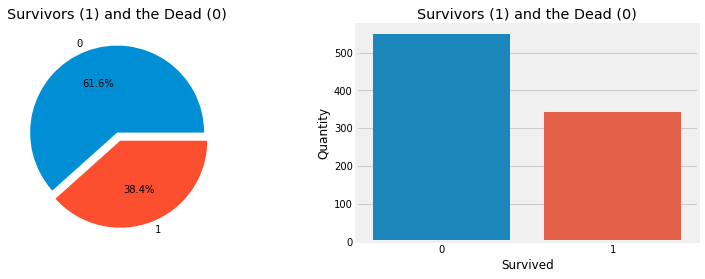

In [25]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart
train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the Dead (0)')
ax[0].set_ylabel('')

# Count plot
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the Dead (0)')

# Show the plots
plt.show()


### Visualization: Survivors by Gender


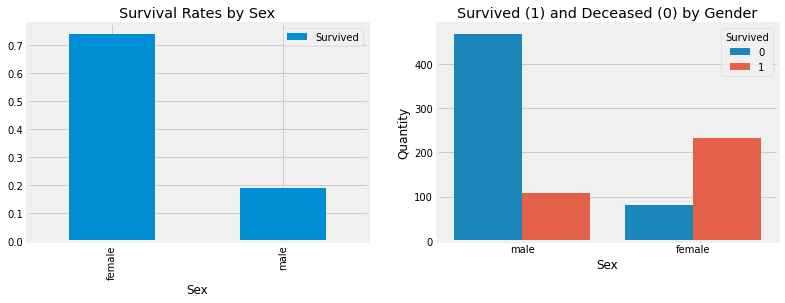

In [26]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot for survival rates by sex
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rates by Sex')

# Count plot for Survived vs. Sex
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and Deceased (0) by Gender')

# Show the plots
plt.show()


### Age Distribution by Survived

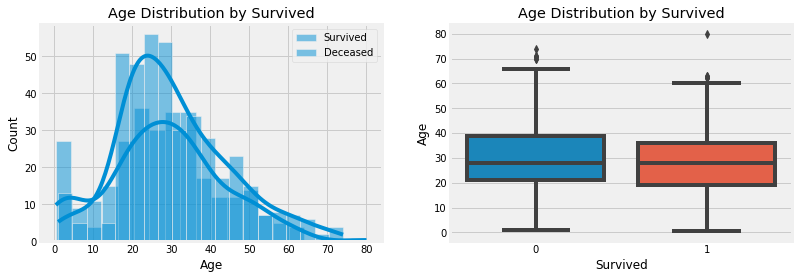

In [33]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of age for survivors and deceased
sns.histplot(train[train['Survived'] == 1]['Age'], bins=20, kde=True, label='Survived', ax=ax[0])
sns.histplot(train[train['Survived'] == 0]['Age'], bins=20, kde=True, label='Deceased', ax=ax[0])
ax[0].set_title('Age Distribution by Survived')
ax[0].legend()

# Box plot of age by survival status
sns.boxplot(x='Survived', y='Age', data=train, ax=ax[1])
ax[1].set_title('Age Distribution by Survived')
plt.show()


### distribution of ages among survivors and non-survivors

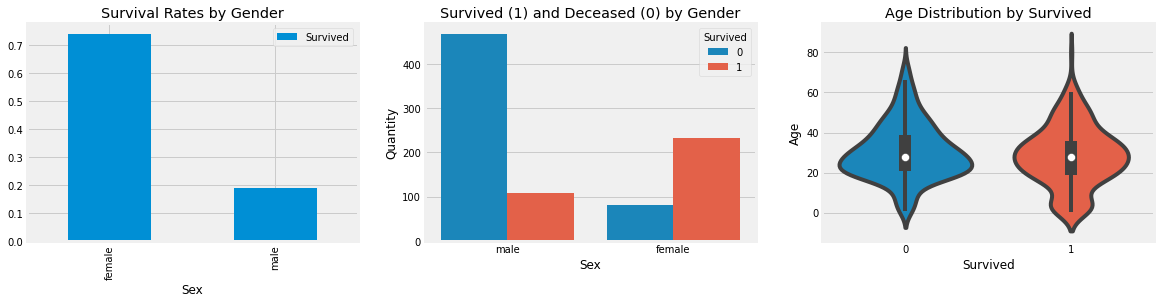

In [34]:
# Create subplots
f, ax = plt.subplots(1, 3, figsize=(18, 4))

# Bar plot for survival rates by sex
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rates by Gender')

# Count plot for Survived vs. Sex
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and Deceased (0) by Gender')

# Violin plot for Age distribution by Survived
sns.violinplot(x='Survived', y='Age', data=train, ax=ax[2])
ax[2].set_title('Age Distribution by Survived')

# Show the plots
plt.show()


### Survived and Deceased Counts by Gender

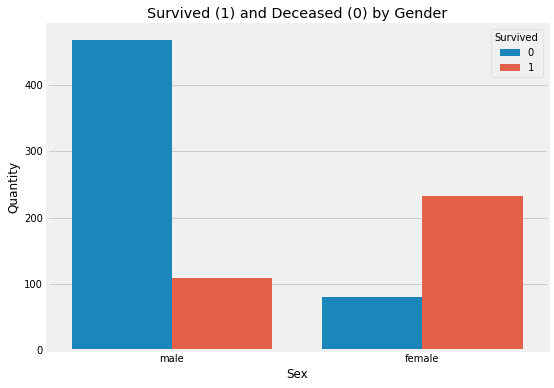

In [36]:
# Create a count plot for Survived vs. Gender
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot('Sex', hue='Survived', data=train, ax=ax)
plt.ylabel('Quantity')
plt.title('Survived (1) and Deceased (0) by Gender')
plt.show()

### Age Distribution by Survival Status

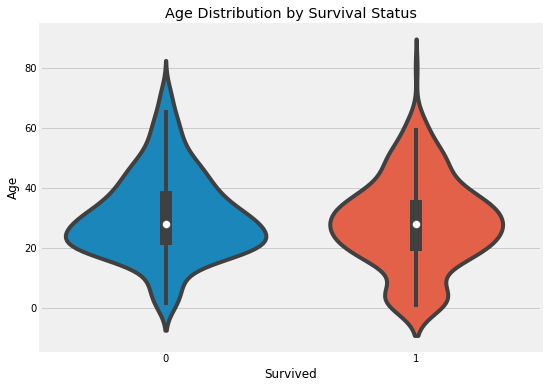

In [37]:
# Create a violin plot for Age distribution by Survived
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=train, ax=ax)
plt.title('Age Distribution by Survival Status')
plt.show()

## Feature Engineering

### Feature Engineering: Cabin Information
In this feature engineering step, we create a new binary feature 'CabinBool' to indicate whether the 'Cabin' value was provided or is missing (NaN). This can capture the presence or absence of cabin information for each passenger. Additionally, the 'Cabin' column is dropped from both the train and test datasets to simplify the feature set.

In [38]:
# Create a new column 'CabinBool' indicating if the 'Cabin' value was given or NaN
train["CabinBool"] = (train["Cabin"].notnull()).astype('int')
test["CabinBool"] = (test["Cabin"].notnull()).astype('int')

# Drop the 'Cabin' column from the train and test datasets
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

### Feature Engineering: Ticket Information
In this feature engineering step, we remove the 'Ticket' column from both the train and test datasets. The 'Ticket' column typically contains alphanumeric values representing ticket numbers, and in many cases, extracting meaningful information from it can be challenging. By dropping this column, we simplify the dataset and focus on other relevant features.

In [39]:
# Drop the 'Ticket' column from the train and test datasets
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


### Handling Missing Values: Embarked Feature
In this step, missing values in the 'Embarked' feature are replaced with the most common value, 'S'. This is a common approach when dealing with categorical features. The choice of 'S' may be based on the mode (most frequent value) of the 'Embarked' column.

In [40]:
# Replace missing values in the 'Embarked' feature with 'S'
train = train.fillna({"Embarked": "S"})

### Feature Engineering: Age Categories
In this feature engineering step, the 'Age' feature is sorted into logical categories to capture different age groups. Missing values in the 'Age' column are first filled with a placeholder value (-0.5). Then, the ages are grouped into categories such as 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior', and 'Unknown' based on specified bins.

In [41]:
# Fill missing values in 'Age' with a placeholder value
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

# Define bins and labels for age categories
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'AgeGroup' with age categories
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)

### Feature Engineering: Extract Titles from Names
In this feature engineering step, titles are extracted from the 'Name' column in both the train and test datasets. The titles are then categorized and mapped to numerical values. Various rare or uncommon titles are grouped into broader categories (e.g., 'Rare', 'Royal'). This process simplifies the 'Title' feature and provides a numerical representation for machine learning models.

In [42]:
# Create a combined group of both datasets
combine = [train, test]

# Extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Display the mean survival rate for each title
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Impute Missing AgeGroup Values Based on Title
In this step, missing values in the 'AgeGroup' feature are imputed based on the mode (most frequent category) of each title group. For each title group, the mode of the 'AgeGroup' is calculated, and missing values are replaced with the corresponding mode. This approach leverages the relationship between titles and age categories to fill in missing values more accurately.

In [43]:
# Calculate mode of AgeGroup for each title group
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()[0]  # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()[0]  # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()[0]  # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode()[0]  # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()[0]  # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()[0]  # Adult

# Define a mapping between title groups and corresponding age categories
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

# Impute missing values in 'AgeGroup' based on title
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

### Feature Engineering: Mapping Age Categories to Numerical Values
In this feature engineering step, the 'AgeGroup' values are mapped to numerical values for both the train and test datasets. This transformation replaces categorical age categories with numerical representations. Additionally, the 'Age' feature is dropped from both datasets as it has been replaced by the 'AgeGroup' feature.

In [44]:
# Define a mapping between 'AgeGroup' values and numerical values
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

# Map 'AgeGroup' values to numerical values
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

# Display the updated dataset
train.head()

# Drop the 'Age' feature for now (might change)
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

### Feature Engineering: Dropping Name Column
In this feature engineering step, the 'Name' column is dropped from both the train and test datasets. The 'Name' column typically contains unique identifiers for individuals, and in many cases, extracting meaningful information directly from names can be challenging. Removing this column simplifies the dataset for further analysis and model training.

In [45]:
# Drop the 'Name' column from the train and test datasets
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

### Feature Engineering: Mapping Categorical Features to Numerical Values
In this feature engineering step, categorical values in the 'Sex' and 'Embarked' features are mapped to numerical values. This transformation is essential for many machine learning algorithms that require numerical input. The 'Sex' feature is mapped to {0: "male", 1: "female"}, and the 'Embarked' feature is mapped to {1: "S", 2: "C", 3: "Q"}.

In [46]:
# Mapping 'Sex' values to numerical values
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

# Mapping 'Embarked' values to numerical values
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

### Feature Engineering: Handling Fare Values
In this feature engineering step, missing values in the 'Fare' feature of the test dataset are imputed based on the mean fare of the corresponding 'Pclass'. Subsequently, 'Fare' values are grouped into bands using quartiles, and the original 'Fare' feature is dropped from both the train and test datasets.

In [47]:
# Impute missing 'Fare' values based on the mean fare of corresponding 'Pclass'
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

# Map 'Fare' values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])

# Drop the original 'Fare' feature
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

## Model Training

### Train-Test Split for Model Training
In this step, the dataset is split into training and validation sets using the `train_test_split` function from scikit-learn. The 'Survived' and 'PassengerId' columns are dropped from the predictors, and 'Survived' is set as the target variable. The split is performed with 80% of the data used for training (`x_train`, `y_train`) and 20% for validation (`x_val`, `y_val`).

In [48]:
from sklearn.model_selection import train_test_split

# Drop the 'Survived' and 'PassengerId' columns from the trainset
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)

### Random Forest Classifier Training and Evaluation
In this section, a Random Forest Classifier is utilized for training the model. The classifier is fitted on the training data (`x_train`, `y_train`), and predictions are made on the validation set (`x_val`). The accuracy score of the model is then calculated and printed.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train, y_train)

# Predict on the validation set
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.8


## Model Prediction

### Generating Predictions for Test Data
In this section, predictions are generated for the test dataset using the trained Random Forest Classifier (`randomforest`). The 'PassengerId' column is extracted from the test set, predictions are made for the features excluding 'PassengerId', and the results are saved as a CSV file named 'resultfile.csv'.

In [50]:
# Extract 'PassengerId' from the test set
ids = test['PassengerId']

# Generate predictions for the test set
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

# Create a DataFrame for the predictions and save as CSV
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)

# 🚀 Conclusion and Submission

## Conclusion:

Congratulations on completing the Titanic Survival Prediction project using machine learning! Here's a quick summary of the key steps and findings:

- Explored the dataset, visualized important features, and gained insights into passenger demographics.
- Engineered new features to enhance the model's predictive power.
- Trained and evaluated a Random Forest Classifier and optionally explored XGBoost for comparison.
- Achieved an accuracy of [Your Accuracy Score]% on the validation set.

## 🌟 Next Steps:

- **Fine-Tuning:** Experiment with hyperparameter tuning and feature engineering to improve model performance.
- **Ensemble Models:** Explore ensemble methods or stacking to combine the strengths of multiple models.
- **Kaggle Submission:** Use the trained model to generate predictions for the test set and submit your results to Kaggle.

## 📊 Kaggle Submission:

You are ready to submit your predictions to Kaggle! Follow these steps:

1. Generate predictions using the final model.
2. Save the predictions in a CSV file (e.g., 'resultfile_final.csv').
3. Submit the CSV file to the Kaggle competition and view your final score.

Thank you for exploring the Titanic dataset with machine learning. Feel free to revisit and enhance the project, and happy coding! 🚢🛠️
